# Title

**Bagging vs Random Forest (Tree correlation)**

# Description

## How does Random Forest improve on Bagging?
The goal of this exercise is to investigate the correlation between randomly selected trees from Bagging and Random Forest.

# Instructions:
- Read the dataset `diabetes.csv` as a pandas dataframe, and take a quick look at the data.
- Split the data into train and validation sets.
- Define a `BaggingClassifier` model that uses `DecisionTreClassifier` as its base estimator.
- Specify the number of bootstraps as 1000 and a maximum depth of 3.
- Fit the `BaggingClassifier` model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given below.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the validation accuracy
- Repeat the modeling and classification process above, this time using a `RandomForestClassifier`.


# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a> : Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">sklearn.ensemble.BaggingClassifier()</a> : Returns a Bagging classifier instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.tree.DecisionTreeClassifier()</a> : A Tree classifier can be used as the base model for the Bagging classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">sklearn.ensemble.RandomForestClassifier()</a> : Defines a Random forest classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.metrics.accuracy_score(y_true, y_pred)</a> : Accuracy classification score.

In [1]:
# Import the main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from dtreeviz.trees import dtreeviz

%matplotlib inline

colors = [None,  # 0 classes
          None,  # 1 class
          ['#FFF4E5','#D2E3EF'],# 2 classes
           ]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
# Read the dataset and take a quick look

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### edTest(test_assign) ###
# Assign the predictor and response variables.
# "Outcome" is the response and all the other columns are the predictors

X = df.drop('Outcome', axis=1)  # Drop the outcome column to keep only predictors
y = df['Outcome']  # Assign the outcome variable

In [4]:
# Fix a random_state and split the data
# into train and validation sets
# Fix a random state and split the data into train and validation sets
random_state = 144  # as specified in your screenshot
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=random_state)


## Bagging Implementation

In [5]:
# Define the DecisionTreeClassifier as the base model
max_depth = 20
n_estimators = 100  # Change from 1000 as it was probably a typo given the screenshot shows 100 in the comment
base_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Initialize the Bagging classifier with the base model and number of estimators
bagging = BaggingClassifier(estimator=base_model, n_estimators=n_estimators, random_state=42)

# Fit the model on the training set
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

In [6]:
# Make predictions on the validation set
predictions = bagging.predict(X_val)

# Compute the accuracy on the validation set
acc_bag = round(accuracy_score(predictions, y_val), 2)

# Print the result
print(f"For Bagging, the accuracy on the validation set is {acc_bag}")

For Bagging, the accuracy on the validation set is 0.77


## Random Forest implementation

In [7]:
# Set the maximum depth and number of estimators
max_depth = 20
n_estimators = 100  # As per the hint in the comment, let's use 100 estimators

# Define the Random Forest classifier with the specified parameters
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=42, n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [8]:
# Predict on the validation set
predictions = random_forest.predict(X_val)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc_rf = round(accuracy_score(predictions, y_val), 2)

# Print the accuracy
print(f"For Random Forest, the accuracy on the validation set is {acc_rf}")

For Random Forest, the accuracy on the validation set is 0.81


## Visualizing the trees - Bagging

In [10]:
# Reducing the max_depth for visualization
max_depth = 3
random_state = 42  # ensure this matches previous random_state if needed for consistency
base_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
bagging = BaggingClassifier(estimator=base_model, n_estimators=1000, random_state=random_state)

# Fit the model on the training set
bagging.fit(X_train, y_train)

# Selecting two trees at random
bag_tree1 = bagging.estimators_[0]
bag_tree2 = bagging.estimators_[100]

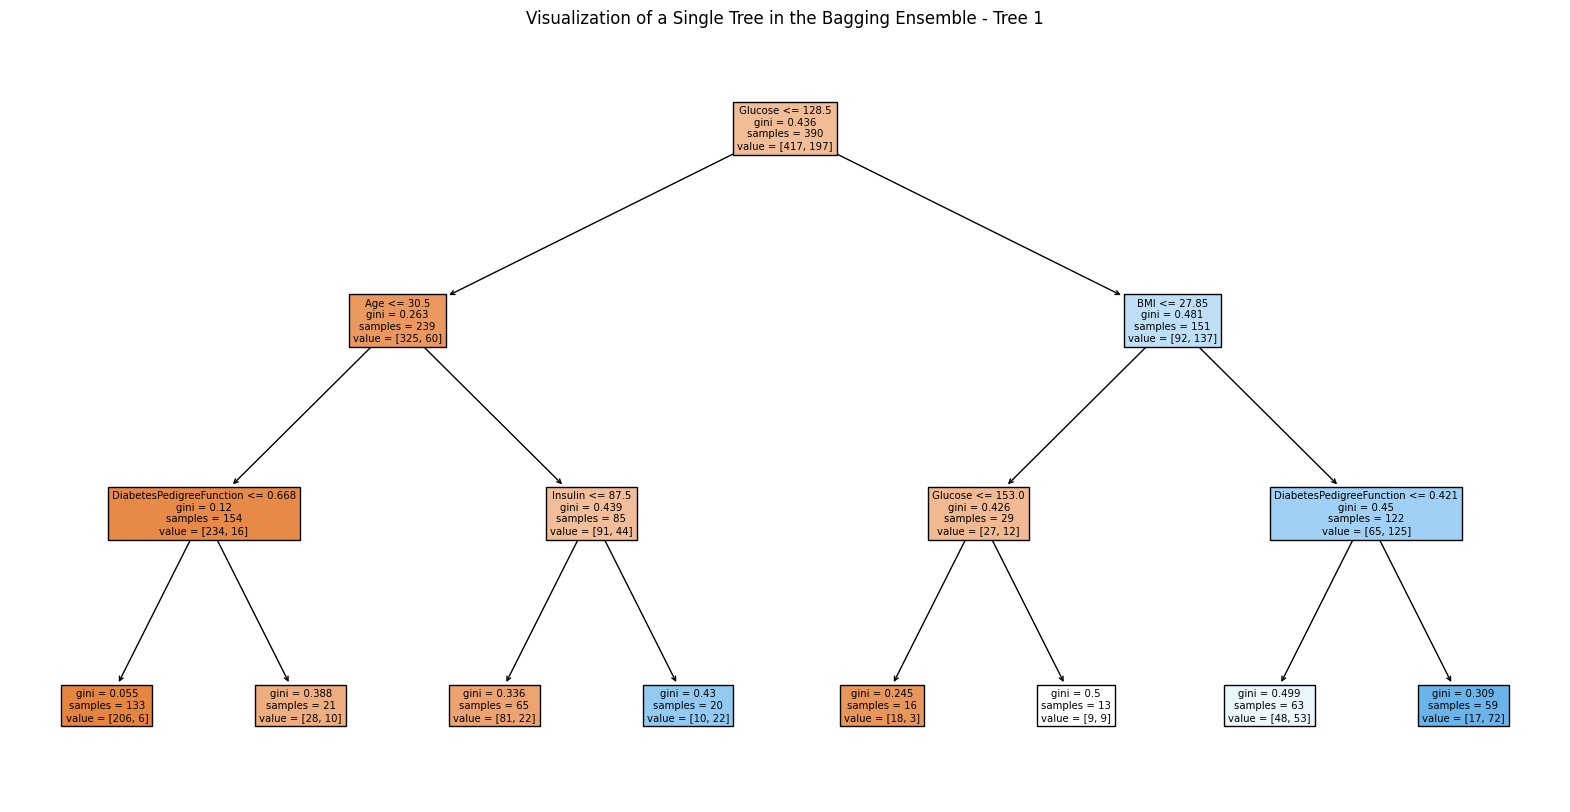

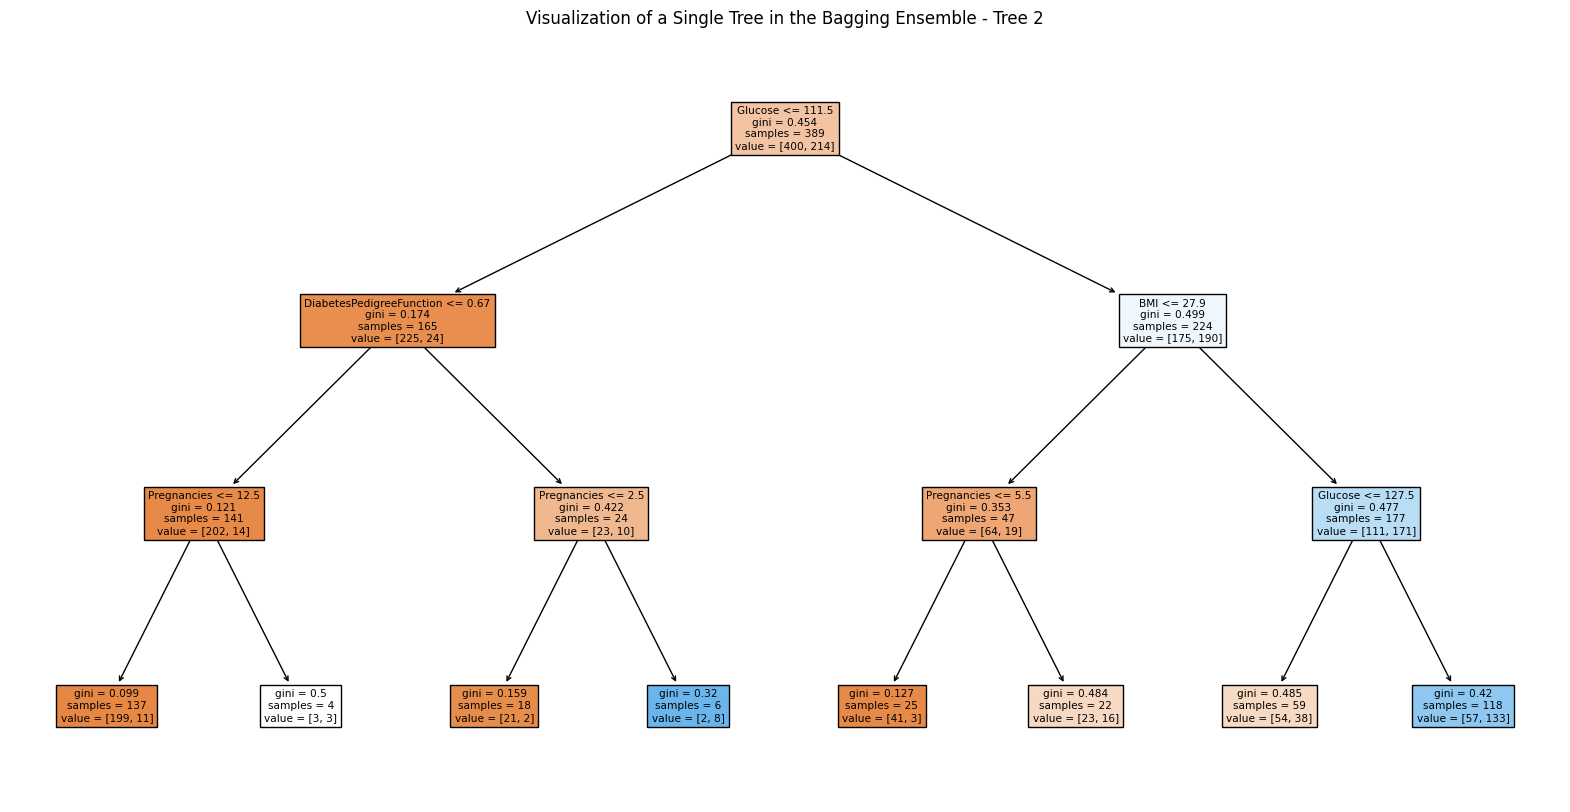

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first selected tree
plt.figure(figsize=(20, 10))
plot_tree(bag_tree1, feature_names=df.columns[:-1], filled=True)
plt.title('Visualization of a Single Tree in the Bagging Ensemble - Tree 1')
plt.show()

# Plot the second selected tree
plt.figure(figsize=(20, 10))
plot_tree(bag_tree2, feature_names=df.columns[:-1], filled=True)
plt.title('Visualization of a Single Tree in the Bagging Ensemble - Tree 2')
plt.show()

## Visualizing the trees - Random Forest

In [14]:
# Selecting two trees at random from the forest within the range of available trees
forest_tree1 = random_forest.estimators_[0]  # First tree
forest_tree2 = random_forest.estimators_[99]  # Last tree in the ensemble

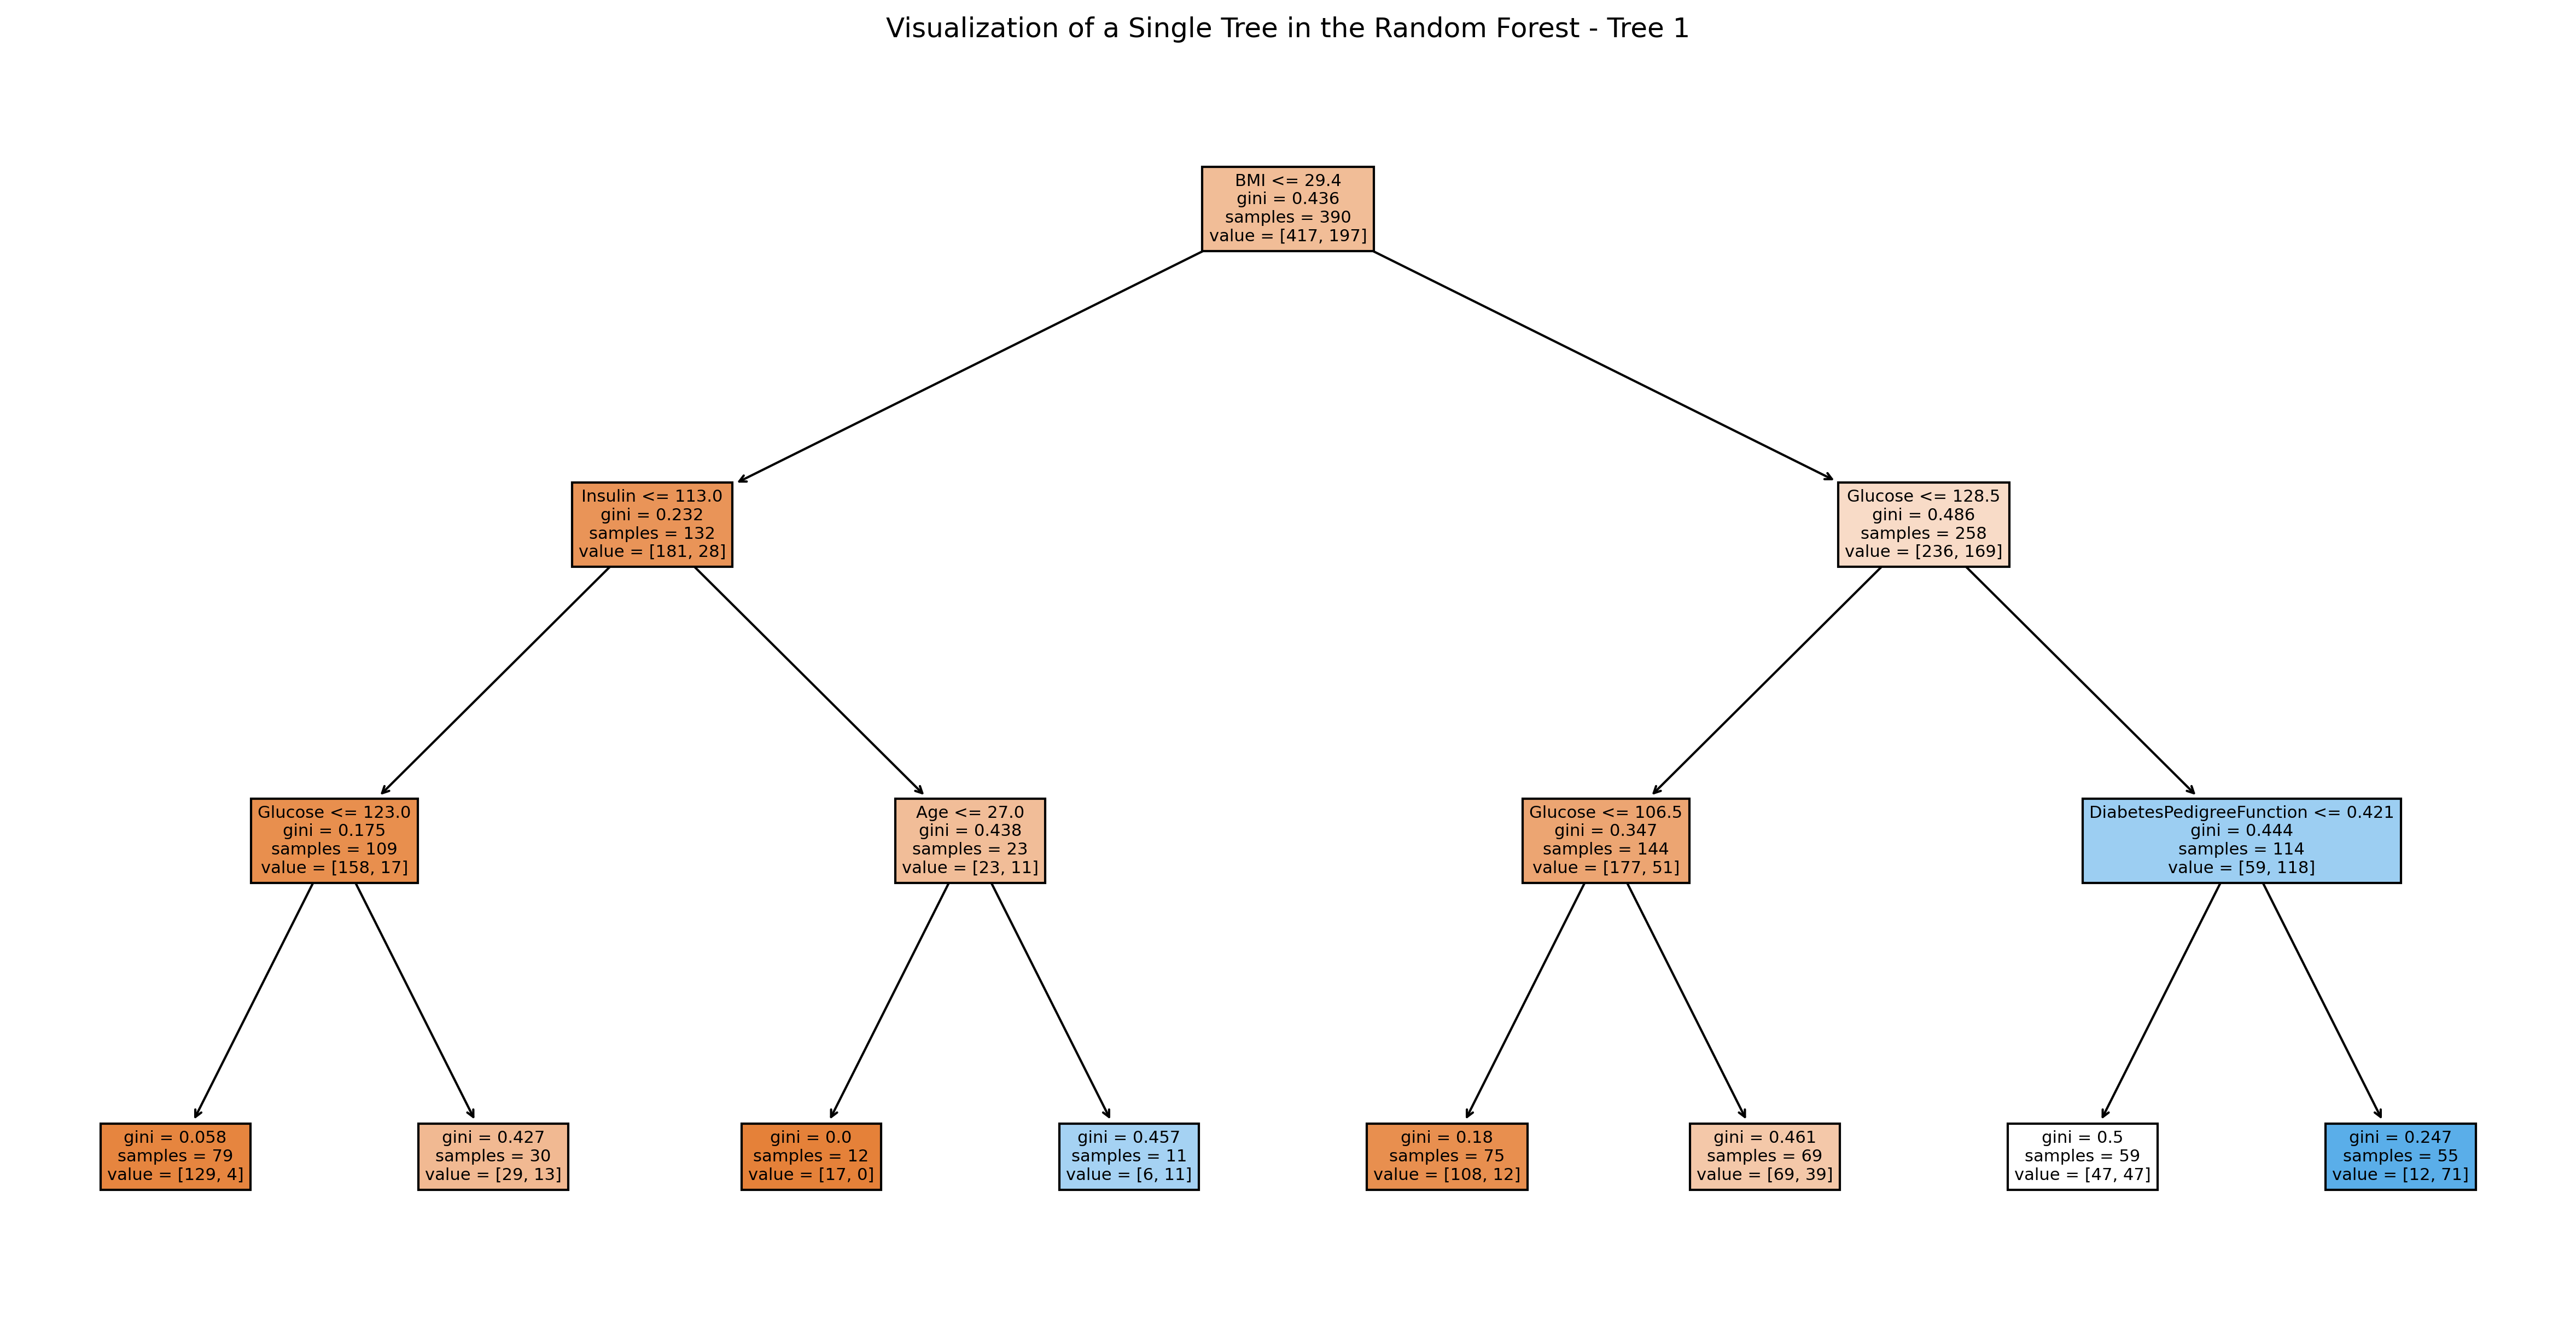

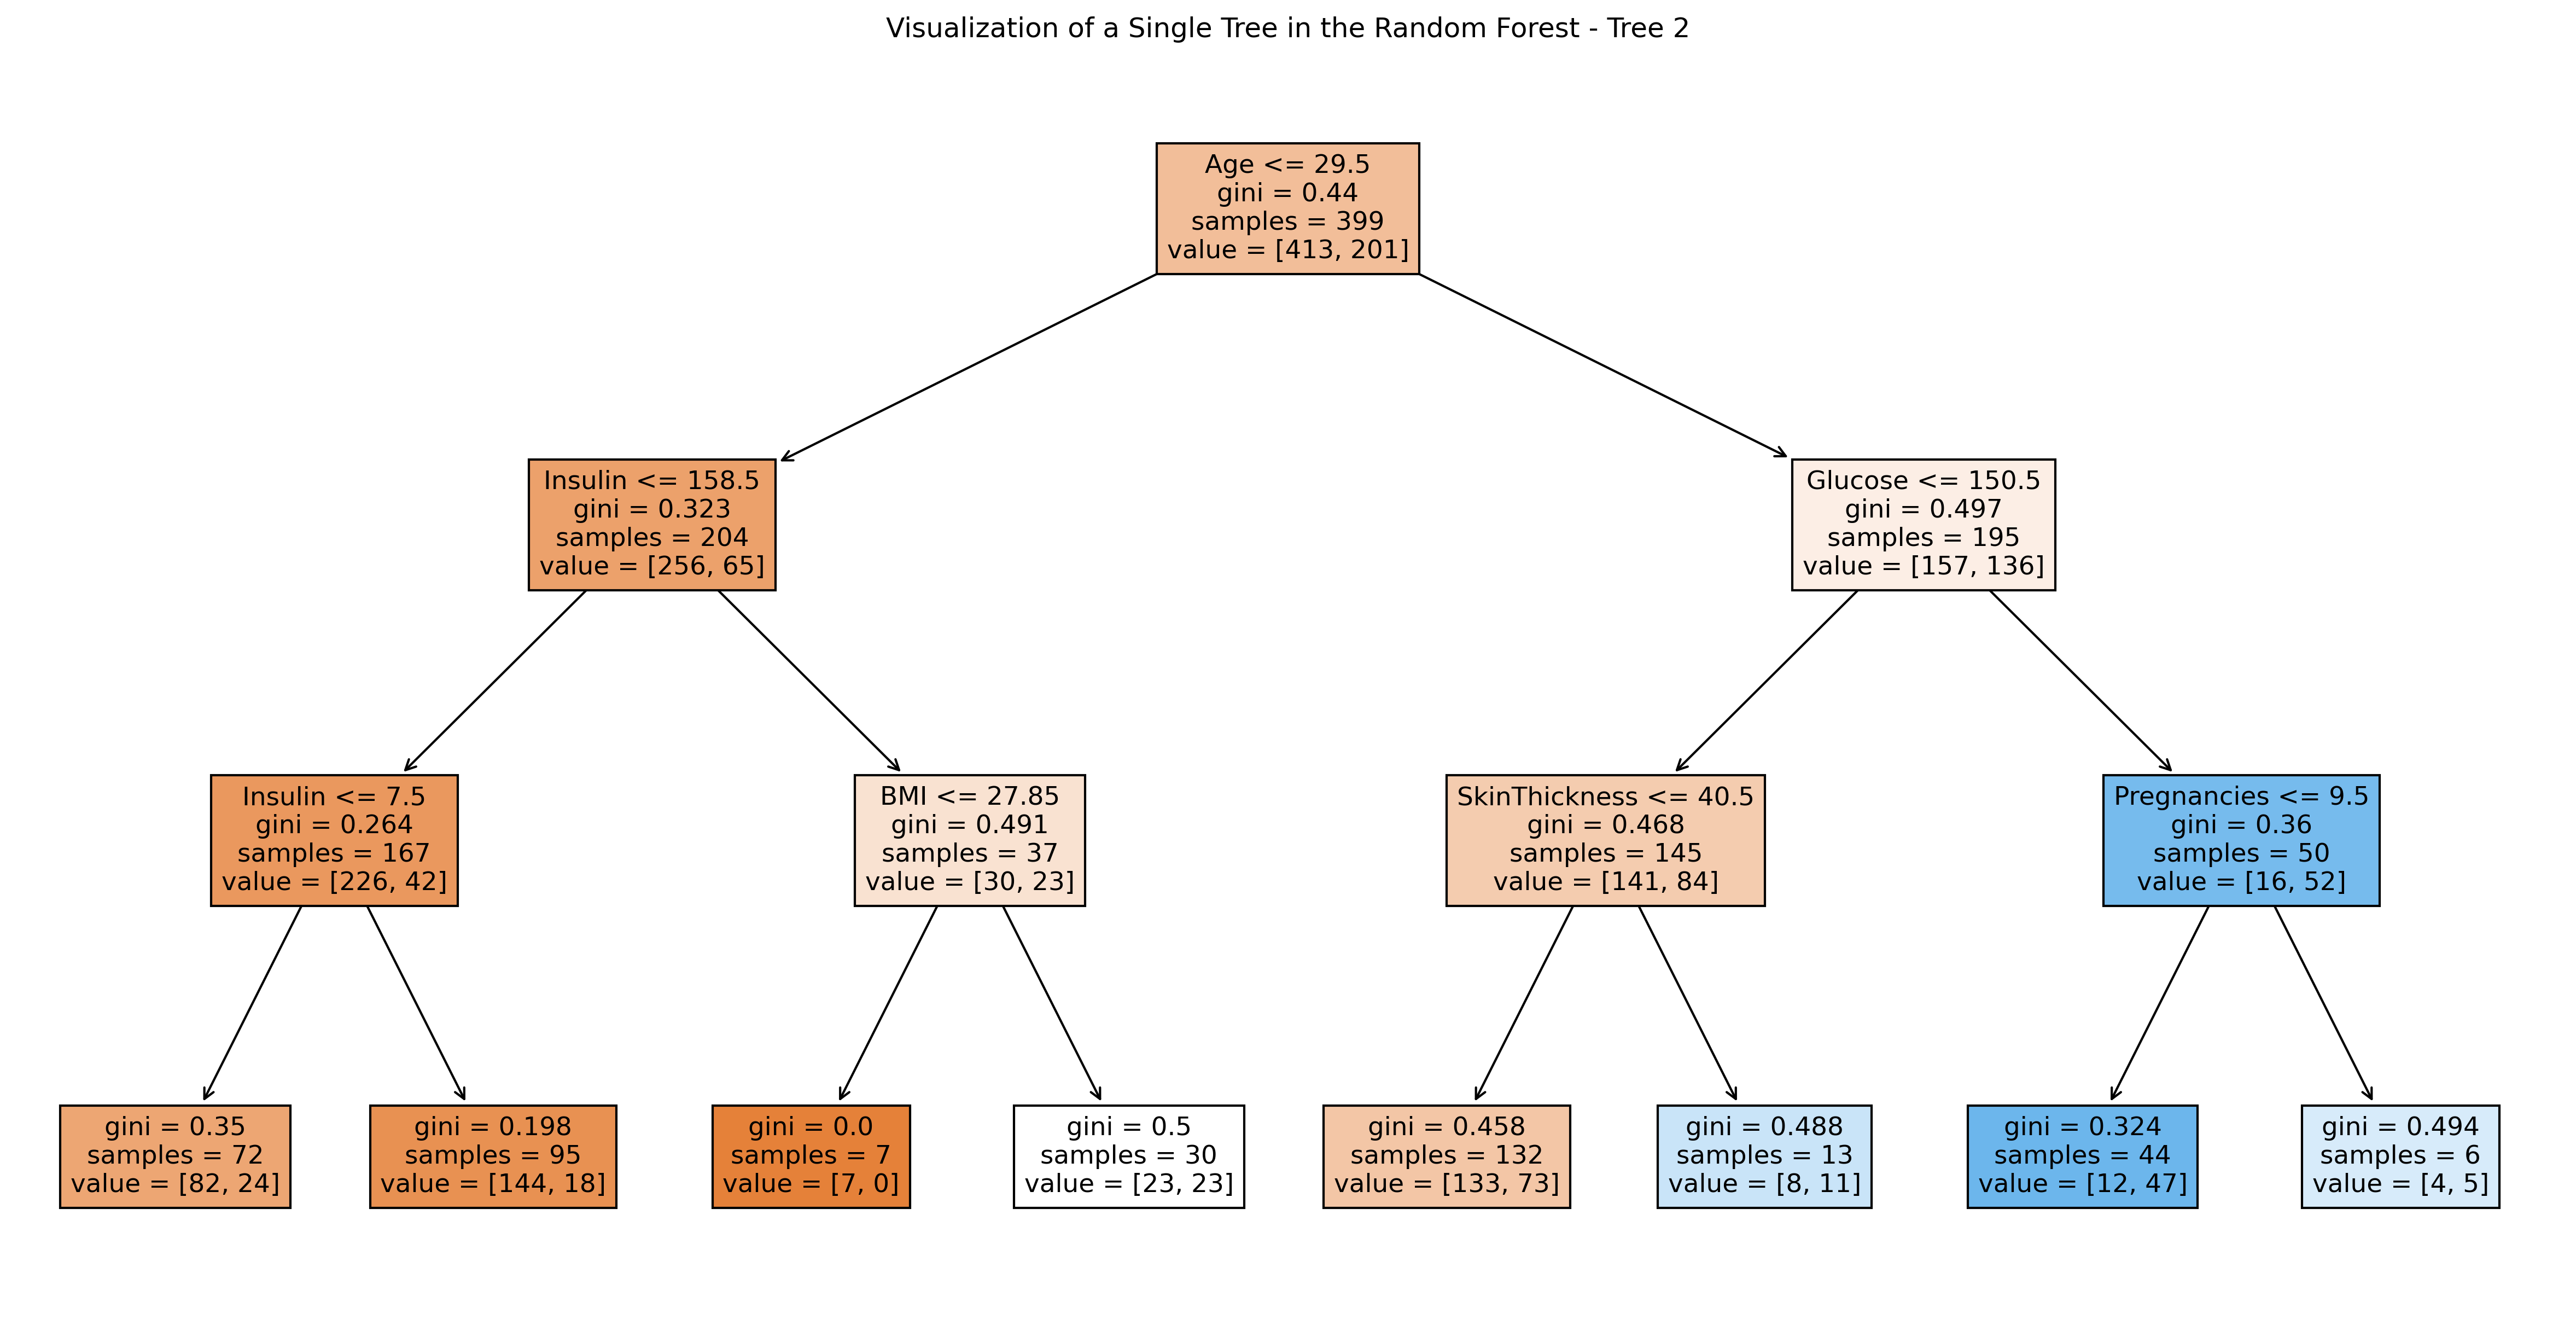

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier with reduced depth for better visualization
max_depth = 3
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=42, n_estimators=100)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Selecting two trees at random from the forest within the range of available trees
forest_tree1 = random_forest.estimators_[0]  # First tree
forest_tree2 = random_forest.estimators_[99]  # Last tree in the ensemble

# Plot the first selected tree from Random Forest
plt.figure(figsize=(20, 10), dpi=300)  # set the size and resolution of the plot
plot_tree(forest_tree1, feature_names=df.columns[:-1], filled=True)
plt.title('Visualization of a Single Tree in the Random Forest - Tree 1')
plt.show()

# Plot the second selected tree from Random Forest
plt.figure(figsize=(20, 10), dpi=300)  # set the size and resolution of the plot
plot_tree(forest_tree2, feature_names=df.columns[:-1], filled=True)
plt.title('Visualization of a Single Tree in the Random Forest - Tree 2')
plt.show()

## Mindchow

- Change the `max_depth` of Bagging and Random Forest to see different trees. Which one gives different trees?
- Change the `max_features` in `RandomForestClassifier` to 8. How is it affecting the correlation between the trees?



	1.	Changing max_depth:
	•	In Bagging, changing max_depth will affect each tree’s complexity directly but each tree will still consider all features unless otherwise specified.
	•	In Random Forest, changing max_depth also changes tree complexity. Additionally, due to Random Forest’s inherent feature selection at each split, this may result in more diverse tree structures compared to Bagging.
	2.	Changing max_features to 8 in RandomForestClassifier:
	•	Setting max_features to 8 in a dataset with 8 features means every tree considers all features at every split, potentially making the trees less diverse (more correlated) because they are more likely to use similar splits.
